## Self Defined Function

In [198]:
import numpy as np
import random
import math
i_values = []
f_values = []

def f(x):
    return (math.cos(3*x)+ math.sin(3*x))**3 + x**2


def spotted_hyena_optimization(f, x_min, x_max, num_iterations):
    x_best = x_min
    f_best = f(x_best)

    for i in range(num_iterations):
        i_values.append(i)
        f_values.append(f_best)

        x_a = random.uniform(x_min, x_max)
        x_b = random.uniform(x_min, x_max)
        y_a = f(x_a)
        y_b = f(x_b)

        if y_a < y_b:
            x_new = x_a
        else:
            x_new = x_b
#         print('num_iterations: ',_)
        print('X_now: ',x_new,'f_best_till: ',f_best)
        
        if f(x_new) < f_best:
            x_best = x_new
            f_best = f(x_new)
        i_values.append(i)
        f_values.append(f_best)
    return x_best, f_best

if __name__ == "__main__":
    x_min = -100
    x_max = 100
    num_iterations = 100
    x_best, f_best = spotted_hyena_optimization(f, x_min, x_max, num_iterations)

    print("The minimum value of f is", f_best, "at x =", x_best)

X_now:  -57.83580516299016 f_best_till:  10000.934463842621
X_now:  -34.23362472314595 f_best_till:  3344.979562879227
X_now:  -84.5222782419203 f_best_till:  1169.256913008787
X_now:  -20.38245256225295 f_best_till:  1169.256913008787
X_now:  77.5356193564343 f_best_till:  416.1260511905589
X_now:  -35.15148271915453 f_best_till:  416.1260511905589
X_now:  -4.454130199109912 f_best_till:  416.1260511905589
X_now:  -14.920823457165383 f_best_till:  19.83927244126638
X_now:  -62.61866658823831 f_best_till:  19.83927244126638
X_now:  -3.004028839453966 f_best_till:  19.83927244126638
X_now:  -39.50691294380218 f_best_till:  6.739237955439227
X_now:  -92.85729284338899 f_best_till:  6.739237955439227
X_now:  -4.741038908299771 f_best_till:  6.739237955439227
X_now:  24.58839908072426 f_best_till:  6.739237955439227
X_now:  56.63993626700568 f_best_till:  6.739237955439227
X_now:  -35.511206037745026 f_best_till:  6.739237955439227
X_now:  14.072962097541634 f_best_till:  6.739237955439227

<AxesSubplot:>

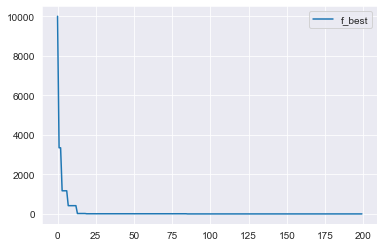

In [199]:
pd.DataFrame(f_values, columns=['f_best']).plot()

In [187]:
df = pd.DataFrame(f_values, columns=['f_best'])

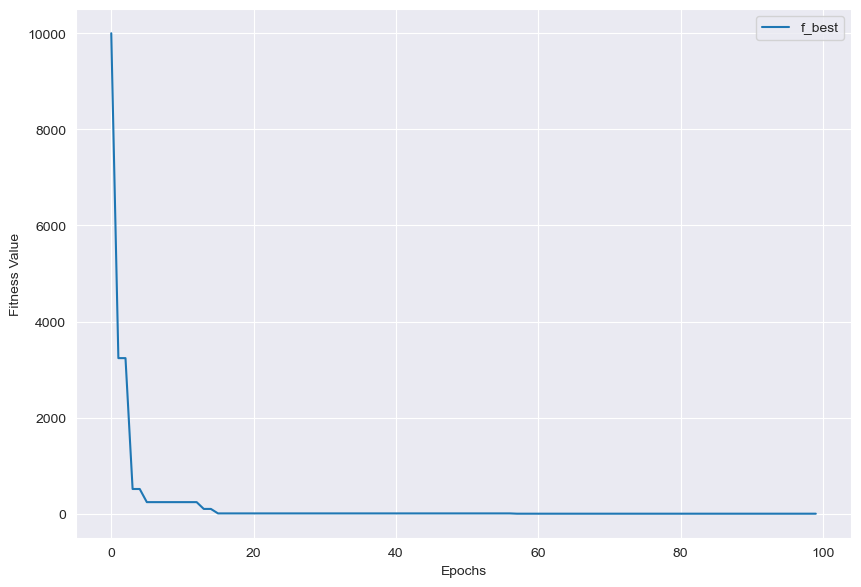

<Figure size 432x288 with 0 Axes>

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7),dpi = 100)
sns.set_style('darkgrid')
p = sns.lineplot(data=df[:100])
p.set(xlabel='Epochs')
p.set(ylabel='Fitness Value')
plt.show()
plt.savefig("sho_self_defined.jpg")

## PSO

In [202]:
# PSO

i_values = []
f_values = []

def f(x):
    return (math.cos(3*x)+ math.sin(3*x))**3 + x**2


def particle_swarm_optimization(f, x_min, x_max, num_iterations, swarm_size):
    x_best = x_min
    f_best = f(x_best)

    particles = []
    for i in range(swarm_size):
        particles.append([random.uniform(x_min, x_max), f(random.uniform(x_min, x_max))])

    for i in range(num_iterations):
        i_values.append(i)
        f_values.append(f_best)

        for j, particle in enumerate(particles):
            p_best = particle[1]
            v = particle[0] + random.random() * (particles[j][0] - particles[j][0])
            x_new = v

            if f(x_new) < p_best:
                particle[0] = x_new
                particle[1] = f(x_new)

            if particle[1] < f_best:
                x_best = particle[0]
                f_best = particle[1]
        i_values.append(i)
        f_values.append(f_best)
    return x_best, f_best


if __name__ == "__main__":
    x_min = -100
    x_max = 100
    num_iterations = 100
    swarm_size = 10
    x_best, f_best = particle_swarm_optimization(f, x_min, x_max, num_iterations, swarm_size)

    print("The minimum value of f is", f_best, "at x =", x_best)


The minimum value of f is 4.257575101640521 at x = -20.94875264563636


In [203]:
df2 = pd.DataFrame(f_values, columns=['f_best'])

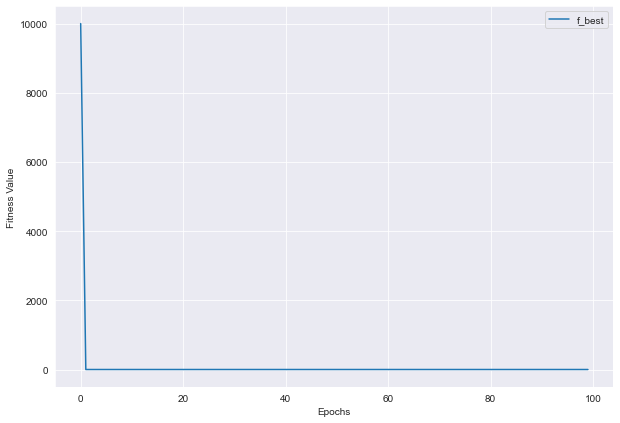

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
p = sns.lineplot(data=df2[:100])
p.set(xlabel='Epochs')
p.set(ylabel='Fitness Value')
plt.show()

In [209]:
df3 = pd.concat([df,df2],axis = 1)
df3.columns = ['SHO_fbest','PSO_fbest']
df3

,SHO_fbest,PSO_fbest
0,10000.934464,10000.934464
1,3238.373200,4.257575
2,3238.373200,4.257575
3,514.288584,4.257575
4,514.288584,4.257575
...,...,...
195,-0.841543,4.257575
196,-0.841543,4.257575
197,-0.841543,4.257575
198,-0.841543,4.257575


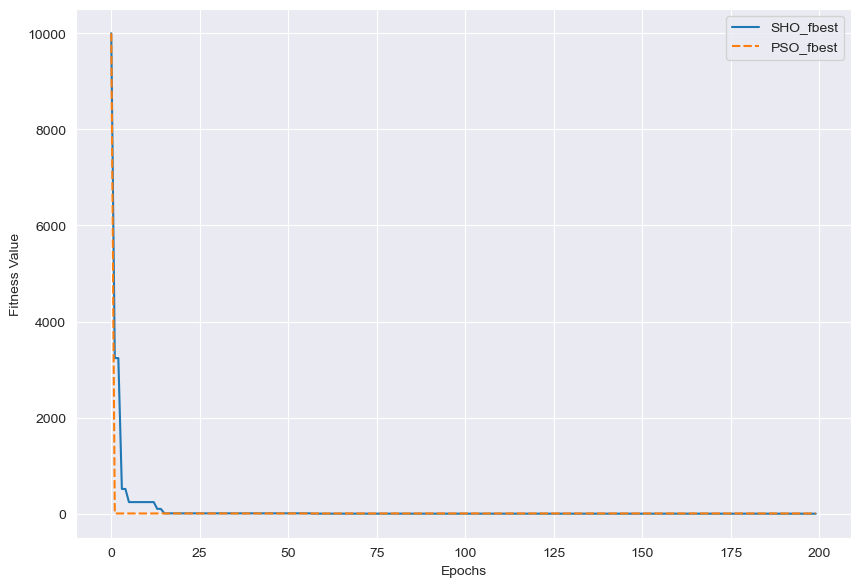

<Figure size 432x288 with 0 Axes>

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7),dpi=100)
sns.set_style('darkgrid')
p = sns.lineplot(data=df3)
p.set(xlabel='Epochs')
p.set(ylabel='Fitness Value')
plt.show()
plt.savefig("sho_self_defined_.jpg")

# Similar to one above we have run SHO and PSO to minimize the cost of function & got the following output

In [4]:
import pandas as pd
df = pd.read_csv('sho_pso_F29.csv')
df

,SHO,PSO
0,10000.00,223473
1,10000.00,223473
2,10000.00,223473
3,10000.00,220695
4,10000.00,215544
...,...,...
294,0.04,90000
295,0.04,90000
296,0.04,90000
297,0.04,90000


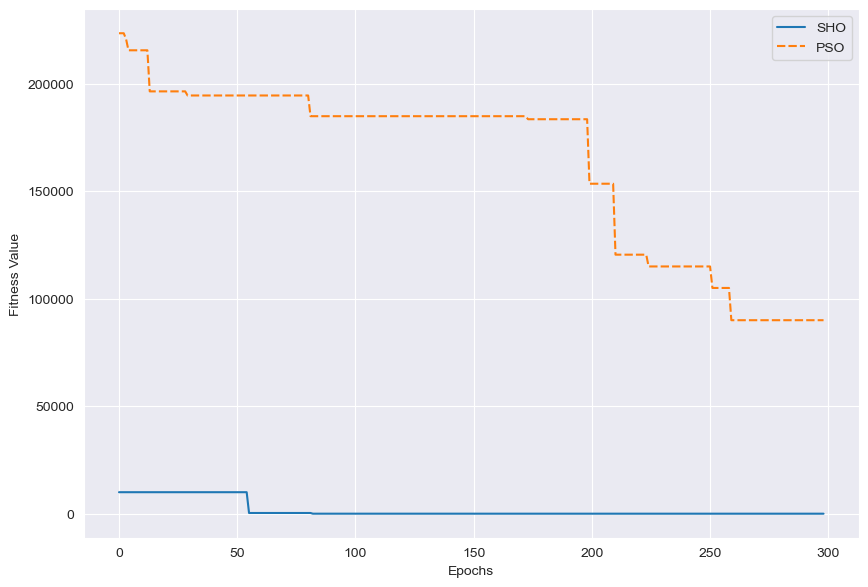

<Figure size 432x288 with 0 Axes>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7),dpi=100)
sns.set_style('darkgrid')
p = sns.lineplot(data=df)
p.set(xlabel='Epochs')
p.set(ylabel='Fitness Value')
plt.show()
plt.savefig("sho_pso_F29.jpg")